# Handwritten Digit Recognition using MLP

**Uzair Ahmad**

1. Import the necessary libraries:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


2. Load the MNIST dataset:

In [3]:
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



3. Split the data into training and testing sets:


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



4. Create an MLP classifier and train it:

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=5, alpha=1e-4,
                    solver='sgd',
                    verbose=10,
                    random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.81563923
Iteration 2, loss = 0.75441364
Iteration 3, loss = 0.48974534
Iteration 4, loss = 0.39921317
Iteration 5, loss = 0.35788759


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=5, random_state=1,
              solver='sgd', verbose=10)


5. Evaluate the MLP classifier on the test data:


In [25]:
accuracy = mlp.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8993571428571429




6. Visualize some test images along with their predicted labels and prediction probabilities:



In [35]:
import warnings

# Suppress UserWarning related to feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

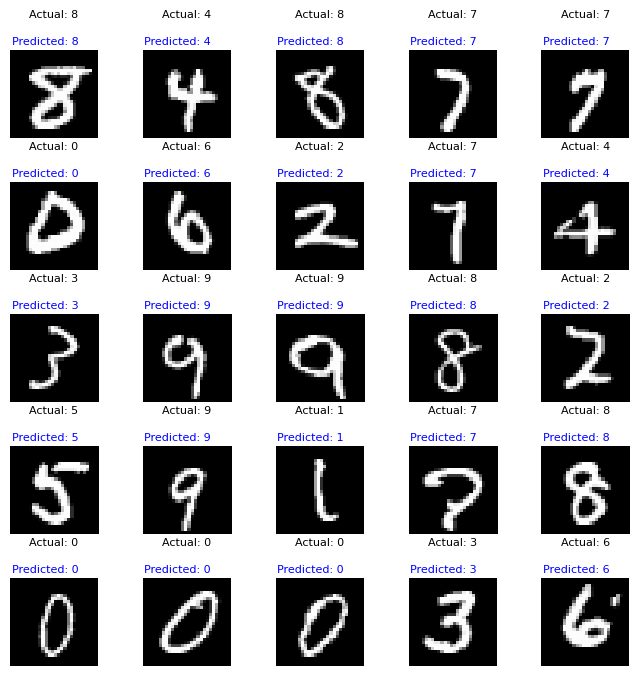

In [40]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
X_test_values = X_test.values  # Convert X_test to a NumPy array

for i, ax in enumerate(axes.ravel()):
    ax.matshow(X_test_values[i].reshape(28, 28), cmap='gray')
    predicted_label = mlp.predict([X_test_values[i]])[0]
    actual_label = y_test.values[i]  # Convert y_test to a NumPy array as well

    ax.set_title(f'Actual: {actual_label}', fontsize=8)
    ax.text(0, -2, f'Predicted: {predicted_label}', fontsize=8, color='blue' if predicted_label == actual_label else 'red')
    ax.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()